<p style="text-align:left;">
    Lefort Tanguy
    <span style="float:right;">
        2019-2020
    </span>
</p>
<center>  M1 - Biostatistics - HMMA238 Développement Logiciel </center><br>

<center style="font-size:300%;"> <strong style="color:blue;"> Conway's game of life </strong> </center><br>

*****  

<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Implementation-without-numpy-" data-toc-modified-id="Implementation-without-numpy--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementation without numpy <a name="without"></a></a></span></li><li><span><a href="#Implementation-with-numpy" data-toc-modified-id="Implementation-with-numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementation with numpy</a></span><ul class="toc-item"><li><span><a href="#Simple-model" data-toc-modified-id="Simple-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple model</a></span></li><li><span><a href="#Random-model" data-toc-modified-id="Random-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random model</a></span></li><li><span><a href="#Specific-configurations" data-toc-modified-id="Specific-configurations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Specific configurations</a></span></li></ul></li><li><span><a href="#Implementation-using-classes-and-numpy" data-toc-modified-id="Implementation-using-classes-and-numpy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementation using classes and numpy</a></span></li><li><span><a href="#Bonus-:-tore-like-model" data-toc-modified-id="Bonus-:-tore-like-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bonus : tore-like model</a></span></li></ul></div>

In [10]:
import numpy as np
import utils as utl
import matplotlib.pyplot as plt
%matplotlib notebook

# Implementation without numpy <a name="without"></a>

In [2]:
filename = "HMMA238_TP_tanguylefort.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6
print("Ma graine sera {}.".format(ma_graine))

Ma graine sera 5.


In order to implement the rules, we need to function right underneath which will allow us to get the number of living cells in the 8-neighborhood of another. This creates a list used in every step of the game.

In [3]:
def calcul_nb_voisins(Z):
    """Compute the number of neighbors.

    Keyword arguments:
        Z -- a 2D list of lists

    Returns:
        N -- a 2D list of lists the size of Z where each element is the sum of
        the values in the 8-neighborhood (the number of neighbors if Z is binary)
    """
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [11]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

N = calcul_nb_voisins(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


In [12]:
def iteration_jeu(Z):
    """Realize an iteration of Conway's game.

    As the rules state, one cell in the grid dies if it's surrounded by 4 or more living cells or stricly less than 2.
    A new cell is born if it's currently dead and there is exactly two living cells in the 8-neighborhood.
    Nothing happens in the other situations. We assume that the border is made of dead cells.

    Keyword arguments:
        Z -- a 2D list of lists representing the initial set of cells

    Returns:
        Z -- a 2D list of lists representing the state of the cells after one iteration of the game

    Example:
        >>> init_grid = [[0,0,0,0],[0,0,1,0],[0,1,1,0],[0,0,0,0]]
        >>> iteration_jeu(test)
        [[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]]
    """
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

<IPython.core.display.Javascript object>


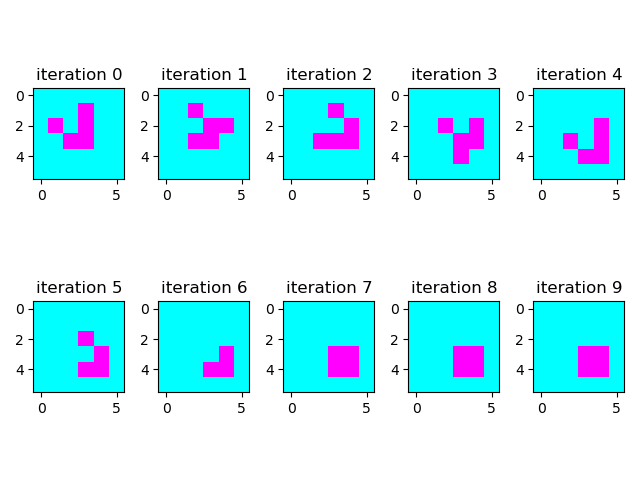

In [13]:
Z = np.array(Z)
fig, axes = plt.subplots(2, 5, num="First 10 iterations of Conway's game of life for our grid")
for i, ax in enumerate(axes.ravel()):
    im = ax.imshow(Z, cmap='cool')
    ax.set_title("iteration "+str(i))
    Z = iteration_jeu(Z)
plt.tight_layout()

#  Implementation with numpy

## Simple model

## Random model 

## Specific configurations

# Implementation using classes and numpy

# Bonus : tore-like model